## Pandas Cheatsheet
* Jupyter Notebooks provide a way of organizing data-related calculations in order to help your user understand *how you arrived at a particular chart or calculation using Python.
* Pandas is a library that helps you work with and visualize data using Python. 

Here are some commands that might be useful for you as you work with the Pandas library:

| Command | Job |
|--|--|
| .read_csv| load dataframe from a CSV file |
| .head(n)|limits the number of rows to n |
| .set_index|sets the primary key of the table|
| .join|merges two tables together based on their key |
| dataframe['a', 'b']| only show columns a and b from the dataframe|
| .groupby(['a', 'b'])| performs an aggregate calculation (count, min, max) by columns a and b|
| .sort_values|sorts dataframe by the columns specified|
| dataframe[dataframe['business_license'] == business_license] | filters by a rule |
| dataframe.column_name | extracts 1 column from dataframe|
| dataframe.plot.barh()| plots the dataframe as a bar chart|


In [1]:
import pandas as pd
%matplotlib inline

### 1. read_csv
For creating a new dataframe from a CSV file

In [2]:
# Load Dataframes from disk:
violations = pd.read_csv("../data/Food_Establishment_Violations.csv", encoding="latin")


### 2. head
For limiting the number of rows

In [3]:
#preview the violations table:
violations.head(3)

business_license violation_date  \
0      13FOOD-0014         1/2/18   
1      13FOOD-0014         1/2/18   
2      08FOOD-0181         1/3/18   

                                           violation  \
0  (32) TOILET AND HAND WASHING FACILITIES: Toile...   
1  (3) FOOD PROTECTION: Potentially hazardous foo...   
2  (10) CROSS CONTAMINATION: Food (ice) dispensin...   

                                  inspector_comments  
0  Provide soap and paper towels at the handsink ...  
1  CRITICAL VIOLATION.Cooked hamburgers at 110 F ...  
2  The dipper wells were storing utensils in wate...

### 3. column indexing (subsetting)
Sometimes you only want to look at a few of the columns. To only view a few columns in Pandas, list them inside of brackets (as seen below).  This makes a copy of the dataframe that only includes the columns you selected.

In [4]:
# show the number of violations by restaurant:

counts_table = violations[["business_license", "violation"]]
counts_table.head(3)

business_license                                          violation
0      13FOOD-0014  (32) TOILET AND HAND WASHING FACILITIES: Toile...
1      13FOOD-0014  (3) FOOD PROTECTION: Potentially hazardous foo...
2      08FOOD-0181  (10) CROSS CONTAMINATION: Food (ice) dispensin...

### 4. groupby + aggregation method
Sometimes you want to get a count of things by a particular attribute. For example:

> How many violations does each restaurant have?

The code below performs the count operation for every distint business license using the groupby method:

In [5]:
counts_table = counts_table.groupby(["business_license"]).count()
counts_table.head(5)

violation
business_license           
08FOOD-0175               7
08FOOD-0180               7
08FOOD-0181               9
09FOOD-0020              13
09FOOD-0029              20

### 5. sort_values
Sords the table according to the column specified in either ascending or descending order:

In [6]:
counts_table = counts_table.sort_values('violation', ascending=False)
counts_table.head(10)

violation
business_license           
09FOOD-0231              26
09FOOD-0117              24
09FOOD-0087              24
09FOOD-0247              23
15FOOD-0020              22
09FOOD-0066              22
09FOOD-0029              20
09FOOD-0073              19
12FOOD-0046              19
09FOOD-0170              19

### 6. plot
Create a chart of your findings using Matplotlib.

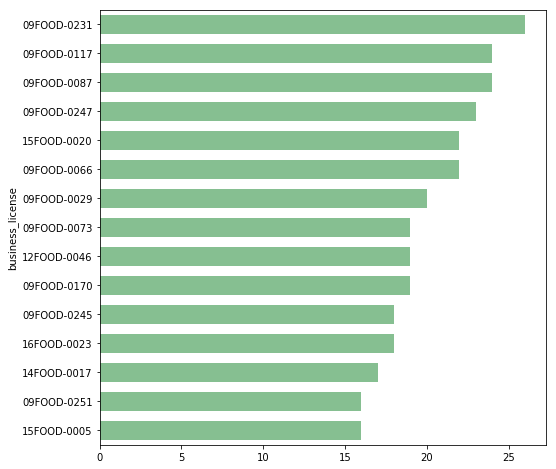

In [7]:
# get top 15:
violation_frequencies = counts_table.violation.head(15)

#reverse ordering:
violation_frequencies = violation_frequencies.iloc[::-1]

# define the plot parameters (color, etc.)
violation_frequencies.plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.65)

# draw the horizontal bar chart:
violation_frequencies.plot.barh()


### 7. filtering
To filter the table, define a rule, and then index the table according to the rule (kind of a weird syntax).

In [8]:
# show the most problematic restaurant / food establishment (09FOOD-0231, 09FOOD-0117, ...):

business_license = input('which food establishment do you want to know about? ')

# 1. create a filter rule
rule = violations['business_license'] == business_license

# 2. apply the filter rule as an index to the dataframe
violations[rule]

which food establishment do you want to know about? 09FOOD-0087


business_license violation_date  \
153      09FOOD-0087        2/20/18   
154      09FOOD-0087        2/20/18   
155      09FOOD-0087        2/20/18   
158      09FOOD-0087        2/20/18   
159      09FOOD-0087        2/20/18   
173      09FOOD-0087        2/20/18   
174      09FOOD-0087        2/20/18   
175      09FOOD-0087        2/20/18   
237      09FOOD-0087        6/12/18   
310      09FOOD-0087        6/12/18   
402      09FOOD-0087        6/12/18   
452      09FOOD-0087        6/12/18   
461      09FOOD-0087       10/30/18   
478      09FOOD-0087        6/12/18   
526      09FOOD-0087        6/12/18   
585      09FOOD-0087        6/12/18   
600      09FOOD-0087       10/30/18   
604      09FOOD-0087        6/12/18   
652      09FOOD-0087        6/12/18   
706      09FOOD-0087        6/12/18   
717      09FOOD-0087       10/30/18   
730      09FOOD-0087       10/30/18   
757      09FOOD-0087       10/30/18   
800      09FOOD-0087       10/30/18   

                                             violation  \
153  (17) FOOD EQUIPMENT AND UTENSILS: Accurate the...   
154     (45) OTHER OPERATIONS: CERTIFIED FOOD HANDLER.   
155  (38) LIGHTING: Provided as required; fixtures ...   
158  (35) INSECT, RODENT, ANIMAL CONTROL: Presence ...   
159  (21) FOOD EQUIPMENT AND UTENSILS: Wiping cloth...   
173  (42) OTHER OPERATIONS: Premises; maintained; f...   
174  (8) CROSS CONTAMINATION: Food protection durin...   
175  (41) OTHER OPERATIONS: Toxic items properly st...   
237     (45) OTHER OPERATIONS: CERTIFIED FOOD HANDLER.   
310  (22) FOOD EQUIPMENT AND UTENSILS: Food contact...   
402  (5) FOOD PROTECTION: Thermometers provided and...   
452  (3) FOOD PROTECTION: Potentially hazardous foo...   
461  (22) FOOD EQUIPMENT AND UTENSILS: Food contact...   
478  (8) CROSS CONTAMINATION: Food protection durin...   
526  (21) FOOD EQUIPMENT AND UTENSILS: Wiping cloth...   
585  (34) GARBAGE AND REFUSE DISPOSAL: Outside stor...   
600  (38) LIGHTING: Provided as required; fixtures ...   
604  (41) OTHER OPERATIONS: Toxic items properly st...   
652    (2) FOOD: Original Container; properly labeled.   
706  (35) INSECT, RODENT, ANIMAL CONTROL: Presence ...   
717               (29) PLUMBING: Installed, maintained   
730  (35) INSECT, RODENT, ANIMAL CONTROL: Presence ...   
757  (37) FLOORS, WALLS AND CEILINGS: Walls, ceilin...   
800  (8) CROSS CONTAMINATION: Food protection durin...   

                                    inspector_comments  
153  The quat test strips expired June 2012 and the...  
154  CRITICAL VIOLATION.FSSMC Marla Cramin issue da...  
155  Install a ceiling light fixture shield in the ...  
158  CRITICAL VIOLATION.The downstairs overhead doo...  
159  When using cloths to wipe food contact surface...  
173  Observed old soiled fry pans under plastic dun...  
174  Do not store fresh whole eggs above ready to e...  
175  CRITICAL VIOLATION.Found an unlabeled grey spr...  
237  CRITICAL VIOLATION. There is no certified food...  
310  Soiled dishes are being stored on the bread sh...  
402  Many coolers do not have a thermometer.  Place...  
452  CRITICAL VIOLATION. A container of cooked stea...  
461  The underside of the flat top grill is heavily...  
478  Raw shell eggs are being stored above bread an...  
526  Numerous wipe clothes are being stored on prep...  
585  There is misc. debris stored along the south s...  
600  The lights in the beverage room are not covere...  
604  CRITICAL VIOLATION. Ortho Home Defense is bein...  
652  Bulk food items are not labeled. Any product o...  
706  CRITICAL VIOLATION. The door sweep to the gara...  
717  The 3 compartment sink in the cook line is lea...  
730  CRITICAL VIOLATION. The front door is propped ...  
757  There is a hole in the wall in the beverage ro...  
800  Raw chicken is being stored above cooked bacon...

## But which restaurants are these?
We have their business license information, but can we figure out who they are?

In [9]:
# load businesses data:
businesses = pd.read_csv("../data/Food_Establishment_Businesses.csv", encoding="latin")
businesses.head(3)

business_license                            business_name  \
0      09FOOD-0032                            Subway #46751   
1      09FOOD-0015  Dar-Us-Sunnah Masjid & Community Center   
2      11FOOD-0003                Shop Now Food and Grocery   

              address      city state  zip_code  \
0  1900 DEMPSTER ST C  Evanston    IL     60202   
1      2045 BROWN AVE  Evanston    IL     60201   
2      1942 MAPLE AVE  Evanston    IL     60201   

                                            location last_inspection_date  
0  1900 DEMPSTER ST C\nEvanston, IL 60202\n(42.04...           01/10/2018  
1  2045 BROWN AVE\nEvanston, IL 60201\n(42.055088...           01/10/2018  
2  1942 MAPLE AVE\nEvanston, IL 60201\n(42.053481...           02/22/2018

### 8. joining
Joining two tables on a column combines the two tables together based on their business license (in this case):

In [10]:
# let's merge the two tables together:
merged_table = violations.set_index('business_license').join(businesses.set_index('business_license'))
merged_table = merged_table.reindex(columns=[
    'violation_date', 'violation', 'inspector_comments', 'business_name', 
    'address', 'city', 'state', 'zip_code', 'location', 'last_inspection_date'
])
merged_table.head(3)

violation_date  \
business_license                  
08FOOD-0175             1/10/18   
08FOOD-0175             1/10/18   
08FOOD-0175             1/10/18   

                                                          violation  \
business_license                                                      
08FOOD-0175       (12) PERSONNEL: Hands washed; clean, good hygi...   
08FOOD-0175       (21) FOOD EQUIPMENT AND UTENSILS: Wiping cloth...   
08FOOD-0175       (32) TOILET AND HAND WASHING FACILITIES: Toile...   

                                                 inspector_comments  \
business_license                                                      
08FOOD-0175       CRITICAL VIOLATION.Observed employee wash her ...   
08FOOD-0175       Quaternary ammonia in the wiping cloth bucket ...   
08FOOD-0175       Provide soap and paper towels at all handsinks...   

                                  business_name             address      city  \
business_license                                                                
08FOOD-0175       Dunkin' Donuts Baskin-Robbins  1900 DEMPSTER ST D  Evanston   
08FOOD-0175       Dunkin' Donuts Baskin-Robbins  1900 DEMPSTER ST D  Evanston   
08FOOD-0175       Dunkin' Donuts Baskin-Robbins  1900 DEMPSTER ST D  Evanston   

                 state  zip_code  \
business_license                   
08FOOD-0175         IL   60202.0   
08FOOD-0175         IL   60202.0   
08FOOD-0175         IL   60202.0   

                                                           location  \
business_license                                                      
08FOOD-0175       1900 DEMPSTER ST D\nEvanston, IL 60202\n(42.04...   
08FOOD-0175       1900 DEMPSTER ST D\nEvanston, IL 60202\n(42.04...   
08FOOD-0175       1900 DEMPSTER ST D\nEvanston, IL 60202\n(42.04...   

                 last_inspection_date  
business_license                       
08FOOD-0175                08/08/2018  
08FOOD-0175                08/08/2018  
08FOOD-0175                08/08/2018

In [11]:
# perform the same calculations as before, but on the new table:
# show the number of violations by restaurant:
merged_table_simplified = merged_table[["business_name", "violation"]]
counts_table = merged_table_simplified.groupby(["business_name", "business_license"]).count()
counts_table = counts_table.sort_values('violation', ascending=False)

counts_table.head(3)

violation
business_name     business_license           
Siam Paragon      09FOOD-0231              26
Bennison's Bakery 09FOOD-0117              24
Sarkis Cafe       09FOOD-0087              24

### Plot the new chart with the business names

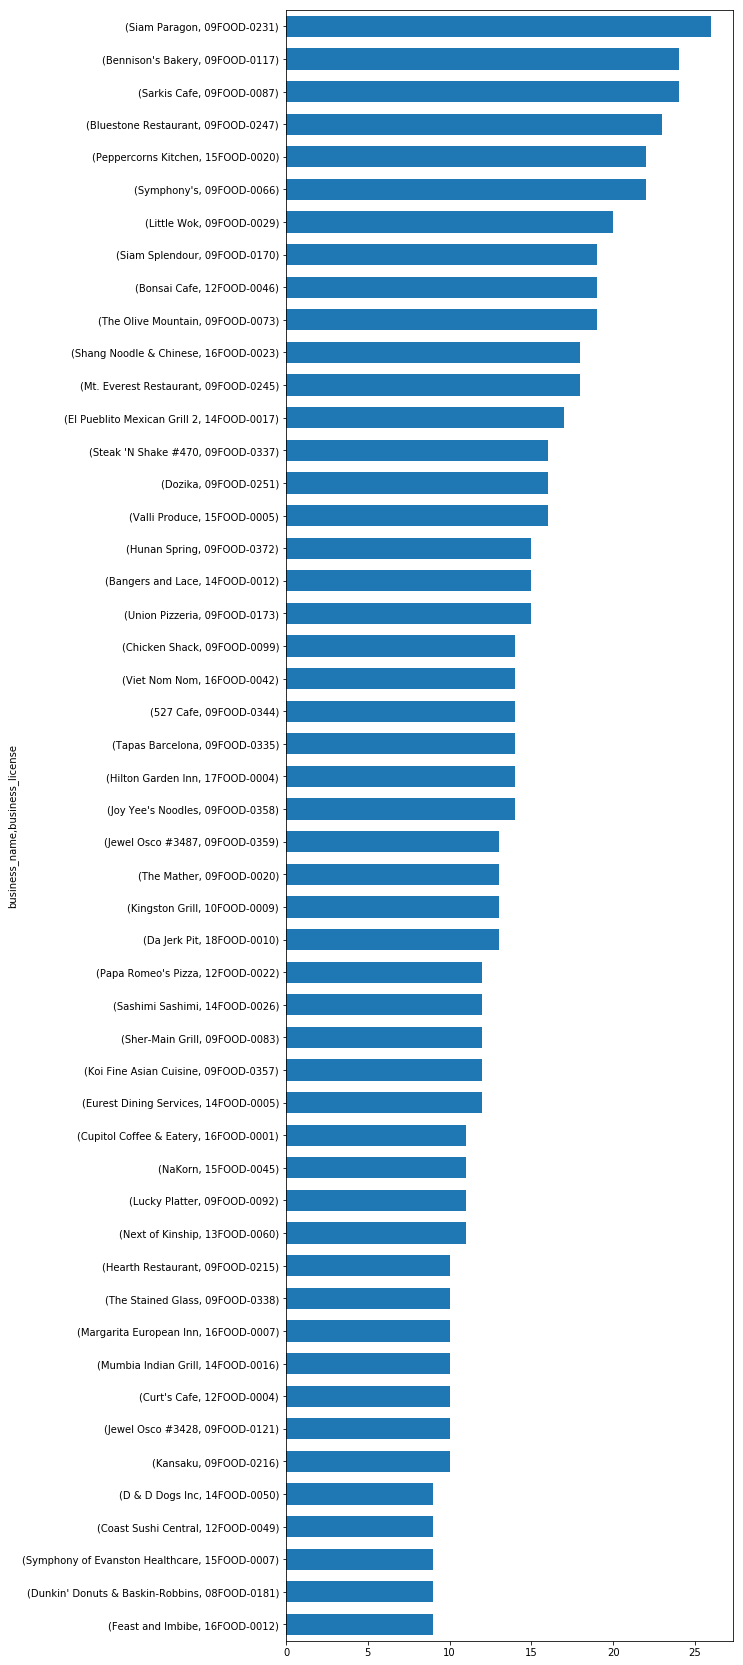

In [12]:
violation_frequencies = counts_table.violation.head(50)

#reverse ordering:
violation_frequencies = violation_frequencies.iloc[::-1]

violation_frequencies.plot(kind='barh', figsize=(8, 30), width=0.65)
violation_frequencies.plot.barh()